---
layout: post
title: Digital divide hw
description:  team 2
type: issues 
comments: true
---

# Digital Divide Homework

**DOWNLOAD AND COPY THIS NOTEBOOK TO YOUR PERSONAL REPOSITORY**

Download and extract [this](https://www.kaggle.com/datasets/kanchana1990/world-internet-usage-data-2023-updated) dataset from kaggle and move it into the same folder as this notebook.

All the preprocessing has been done for you, and the unneeded columns have been dropped. Your task is to loop through the Rate (WB) column and print the country name associated with the percentage, the percentage, and "doing great" if the percentage is above 70% or "needs improvement" if not above 70%.

For example, 18.4% of people in Afghanistan have access to the internet (According to data from the World Bank), so you would print "Afghanistan: 18.4: Needs improvement"

On the other hand, Albania has 83.1% internet access so you would print "Albania: 83.1%: doing great"

In [2]:
import pandas as pd

# Load and clean the data
data = pd.read_csv("/home/daksha_gowda/nighthawk/dakshaggCSP_2025/_notebooks/Foundation/Sprint5/internet_users.csv").drop(columns=['Notes', 'Year.2', 'Users (CIA)', 'Rate (ITU)', 'Year.1'])
data_cleaned = data.dropna()


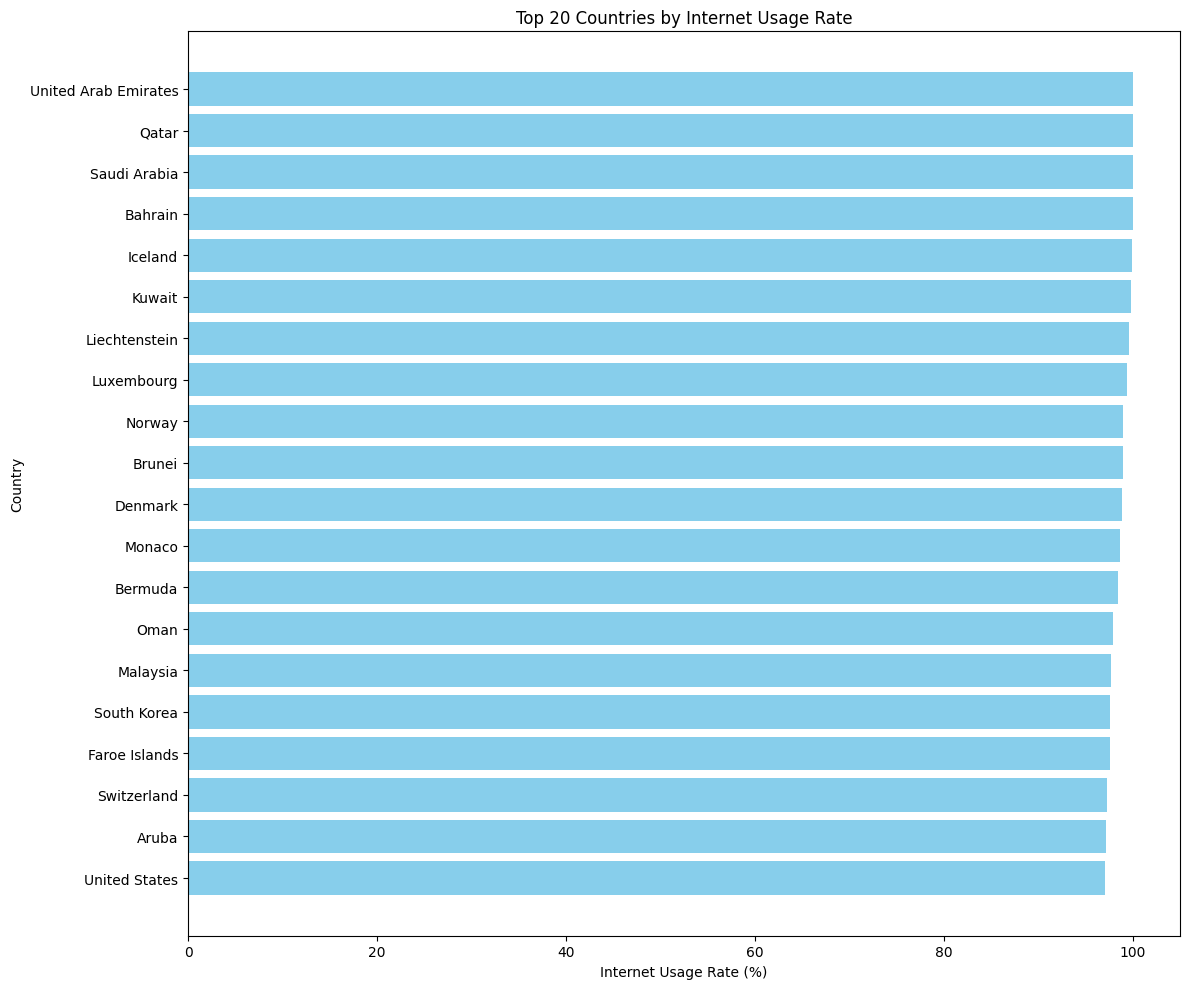

Summary Statistics for Internet Usage Rates:
Global Average: 70.73%
Median: 78.70%
Minimum: 10.00% (Uganda)
Maximum: 100.00% (Bahrain)
Standard Deviation: 25.07%

Countries with lowest internet usage rates:
Slovakia: 89.90%
Cape Verde: 72.10%
Bulgaria: 80.40%
Rwanda: 34.40%
Cayman Islands: 81.10%
Mongolia: 83.90%
Afghanistan: 18.40%
El Salvador: 62.90%
Brunei: 99.00%
Laos: 66.20%

Digital Divide Analysis - Number of countries in each usage category:
Usage_Category
Very Low     12
Low          38
Medium       40
High        119
Name: count, dtype: int64


/tmp/ipykernel_1117/2707048304.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Usage_Category'] = pd.cut(


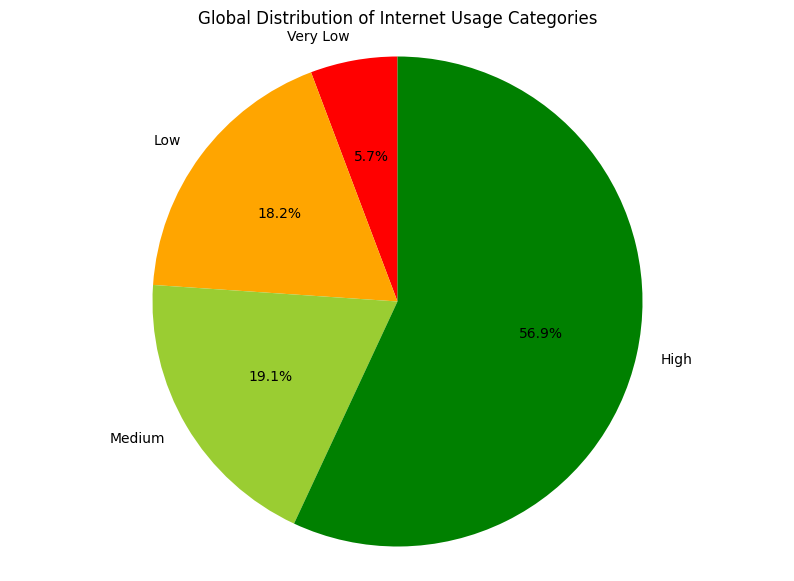

In [4]:
y = data_cleaned['Rate (WB)'] # Take Percentage of the population using the internet from World Bank data in dataset
name = data_cleaned['Location'] # take contry name from WB data in dataset

# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sort data by internet usage rate for better visualization
sorted_indices = np.argsort(y)
sorted_y = np.array(y)[sorted_indices]
sorted_names = np.array(name)[sorted_indices]

# Create a bar chart of internet usage rates by country
plt.figure(figsize=(12, 10))
plt.barh(sorted_names[-20:], sorted_y[-20:], color='skyblue')  # Plot top 20 countries
plt.xlabel('Internet Usage Rate (%)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Internet Usage Rate')
plt.tight_layout()
plt.show()

# Calculate and display summary statistics
print("Summary Statistics for Internet Usage Rates:")
print(f"Global Average: {y.mean():.2f}%")
print(f"Median: {y.median():.2f}%")
print(f"Minimum: {y.min():.2f}% ({name[y.idxmin()]})")
print(f"Maximum: {y.max():.2f}% ({name[y.idxmax()]})")
print(f"Standard Deviation: {y.std():.2f}%")

# Find countries with extremely low internet usage (bottom 10)
bottom_10_indices = np.argsort(y)[:10]
print("\nCountries with lowest internet usage rates:")
for i in bottom_10_indices:
    print(f"{name[i]}: {y[i]:.2f}%")

# Analyze the digital divide by creating usage categories
data_cleaned['Usage_Category'] = pd.cut(
    data_cleaned['Rate (WB)'], 
    bins=[0, 25, 50, 75, 100],
    labels=['Very Low', 'Low', 'Medium', 'High']
)

# Count countries in each category
category_counts = data_cleaned['Usage_Category'].value_counts().sort_index()
print("\nDigital Divide Analysis - Number of countries in each usage category:")
print(category_counts)

# Create a pie chart of the usage categories
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'yellowgreen', 'green'])
plt.title('Global Distribution of Internet Usage Categories')
plt.axis('equal')
plt.show()

# Submission Instructions

DM the link to your notebook on your personal repository **with all the code cells executed** to Aditya Katre on Slack.

Also write a 3 sentence summary of what you added and HOW it works.

I added comprehensive data visualization and analysis features including a bar chart of top internet usage countries and a pie chart showing the distribution of countries across usage categories (Very Low to High). The code implements data sorting and categorization techniques to identify digital divide patterns, calculating key statistics like global average, median, and standard deviation while highlighting countries with the lowest connectivity. The implementation uses pandas' cut() function to categorize countries into usage groups and leverages matplotlib's visualization capabilities to create intuitive charts that clearly display global internet usage disparities.